# Onset Detection
### from librosa.onset.onset_detect tutorial

In [2]:
import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt

#import utils
#import creation


AUDIO_DIR = os.environ.get('C:/Users/laelu/fma/data/fma_electronic')

f1='C:/Users/laelu/fma/data/fma_electronic/001066.mp3'
y , sr = librosa.load(f1)

C:\Users\laelu\anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


### Short Time Fourier Transform Spectrogram

C:\Users\laelu\anaconda3\lib\site-packages\librosa\core\spectrum.py:1641: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn(
C:\Users\laelu\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\laelu\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\laelu\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; suppor

Text(0.5, 1.0, 'Power spectrogram')

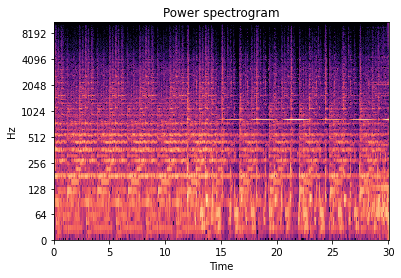

In [3]:
D = librosa.stft(y)
times = librosa.frames_to_time(np.arange(D.shape[1]))
plt.figure()
ax1 = plt.subplot(1, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),y_axis='log', x_axis='time')
plt.title('Power spectrogram')

### Onset

In [4]:
librosa.onset.onset_detect(y=y, sr=sr, units='time')      

array([ 0.06965986,  0.18575964,  0.46439909,  0.71981859,  1.06811791,
        1.25387755,  1.62539683,  1.78793651,  2.34521542,  2.62385488,
        2.90249433,  3.15791383,  3.41333333,  3.94739229,  4.31891156,
        4.5046712 ,  5.03873016,  5.34058957,  5.59600907,  5.87464853,
        6.13006803,  6.66412698,  7.03564626,  7.19818594,  7.4768254 ,
        7.75546485,  8.03410431,  8.31274376,  8.56816327,  8.82358277,
        9.35764172,  9.729161  ,  9.91492063, 10.44897959, 10.750839  ,
       11.0062585 , 11.28489796, 11.54031746, 12.00471655, 12.05115646,
       12.37623583, 12.86385488, 13.09605442, 13.39791383, 13.65333333,
       13.93197279, 14.18739229, 14.65179138, 14.79111111, 15.09297052,
       15.16263039, 15.37160998, 15.62702948, 15.90566893, 15.95210884,
       16.16108844, 16.67192744, 16.78802721, 17.04344671, 17.22920635,
       17.41496599, 17.78648526, 18.06512472, 18.2276644 , 18.59918367,
       18.85460317, 19.04036281, 19.38866213, 19.76018141, 19.87

In [5]:
o_env = librosa.onset.onset_strength(y, sr=sr)
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

### Onset Strength & Times vs. Power Spectrogram

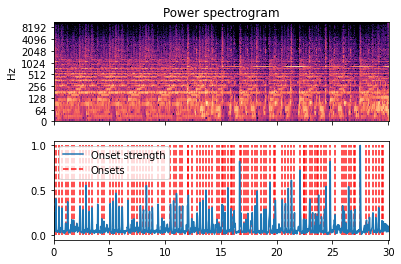

In [6]:
D = np.abs(librosa.stft(y))
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),x_axis='time', y_axis='log', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
ax[1].plot(times, o_env, label='Onset strength')
ax[1].vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,linestyle='--', label='Onsets')
ax[1].legend()